![](https://i.imgur.com/EHwHRCJ.jpeg)

**Goal:** Correctly classify Taylor Swift lyric to correct album based on text data alone

In [1]:
# calculation packages
import numpy as np 
import pandas as pd 
from collections import Counter

# sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# visualization
import matplotlib.pyplot as plt

# personal
from creating_dataset import album_df


![](https://i.imgur.com/bsi0iYG.png)

**Original Data Source:** https://www.kaggle.com/datasets/thespacefreak/taylor-swift-song-lyrics-all-albums

**Why I created my own:** 
My decision to build upon the original dataset came from my understanding of machine learning models, which have developed throughout the quarter, as well as previous research done in text lyric classification. The original data set, which separated lyrics line by line, seemed to lack the context that would be necessary for correct classification.

For example, an example of a data point in the original dataset is: <br>
‘But it would've been fun” <br>
Whereas the same point in mine is: <br>
But it would've been fun, If you would've been the one” <br>

By combining consecutive lines, I was able to capture the fuller picture and provide the model with more contextual information to learn from, and in turn, perform classification texts better…

Further, the original dataset was missing some of the more current songs (Taylor's Version and Midnights), as well as some of the unreleased songs from albums. I added approximately 40 more songs to the dataset using these functions I created.

Another reason I created my dataset and these functions was to experiment with ‘lyric snippet’ length. In previous lyrical/poetry analyses, the entire length of the song/poem was used as one data point. Because my experiment revolves around only using 1 artist, this was not possible. However,  it doesn’t mean I couldn’t experiment with length. By creating these functions, I was able to run models through with ‘1’, ‘2’, and ‘3’ length lyrical snippets, and answer one of my research questions.

The functions that I made are shown in 'creating_dataset.ipynb'

In [2]:
pd.set_option('display.max_colwidth', None)
# example of original data set, each album was it's own csv
og_data = pd.read_csv('09-evermore_deluxe_version.csv')
og_data.head()

,album_name,track_title,track_n,lyric,line
0,evermore (deluxe version),willow,1,I'm like the water when your ship rolled in that night,1
1,evermore (deluxe version),willow,1,"Rough on the surface, but you cut through like a knife",2
2,evermore (deluxe version),willow,1,And if it was an open-shut case,3
3,evermore (deluxe version),willow,1,I never would've known from that look on your face,4
4,evermore (deluxe version),willow,1,Lost in your current like a priceless wine,5


In [4]:
# and data after running the csv through my functions
new_data = album_df('09-evermore_deluxe_version.csv', 17, False)
new_data.head()

,album_name,track_n,track,lyrics
0,evermore (deluxe version),willow,1,"I'm like the water when your ship rolled in that night Rough on the surface, but you cut through like a knife"
1,evermore (deluxe version),willow,1,And if it was an open-shut case I never would've known from that look on your face
2,evermore (deluxe version),willow,1,"Lost in your current like a priceless wine The more that you say, the less I know"
3,evermore (deluxe version),willow,1,"Wherever you stray, I follow I'm begging for you to take my hand"
4,evermore (deluxe version),willow,1,"Wreck my plans, that's my man Life was a willow and it bent right to your wind"


In [3]:
# after creating a new version for each each album, adding in newer music, and concatenating the csvs
# I ended up with this dataset. Now, I will move onto cleaning and exploring the dataset
data = pd.read_csv('final_data.csv')
data

,album_name,track,track_n,lyrics
0,Taylor Swift,Tim McGraw,1.0,He said the way my blue eyes shined Put those Georgia stars to shame that night
1,Taylor Swift,Tim McGraw,1.0,"I said, ""That's a lie"" Just a boy in a Chevy truck"
2,Taylor Swift,Tim McGraw,1.0,That had a tendency of gettin' stuck On back roads at night
3,Taylor Swift,Tim McGraw,1.0,And I was right there beside him all summer long And then the time we woke up to find that summer gone
4,Taylor Swift,Tim McGraw,1.0,But when you think Tim McGraw I hope you think my favorite song
...,...,...,...,...
5301,Taylor Swift,Diary Of Me,NaN,Get a look on the inside Oh what you get is what you see
5302,Taylor Swift,Diary Of Me,NaN,Baby you hold the key To the diary of me
5303,Taylor Swift,Diary Of Me,NaN,Yeah here I am an open book Turn the page it's all the rage
5304,Taylor Swift,Diary Of Me,NaN,Get a look on the inside Oh what you get is what you see


![](https://i.imgur.com/pyAOrXH.png)

# Cleaning The Dataset
* Because I added unreleased songs without track numbers, I have many NaN values, which caused my track_n column to be converted to floats.
* If I was keeping this column, I would fill the zeros. However, this column is not necessary for my analysis so I will drop it, along with 'track'.

In [4]:
data = data.drop(['track', 'track_n'], axis = 1)
data

,album_name,lyrics
0,Taylor Swift,He said the way my blue eyes shined Put those Georgia stars to shame that night
1,Taylor Swift,"I said, ""That's a lie"" Just a boy in a Chevy truck"
2,Taylor Swift,That had a tendency of gettin' stuck On back roads at night
3,Taylor Swift,And I was right there beside him all summer long And then the time we woke up to find that summer gone
4,Taylor Swift,But when you think Tim McGraw I hope you think my favorite song
...,...,...
5301,Taylor Swift,Get a look on the inside Oh what you get is what you see
5302,Taylor Swift,Baby you hold the key To the diary of me
5303,Taylor Swift,Yeah here I am an open book Turn the page it's all the rage
5304,Taylor Swift,Get a look on the inside Oh what you get is what you see


In [7]:
# now I will make sure I have no other missing values
data.isnull().sum()

album_name    0
lyrics        0
dtype: int64

- Since I added in newer versions of albums ('Taylor's Version'), I need to combine the albums correctly

In [8]:
data['album_name'].unique()

array(['Taylor Swift', 'Fearless', 'Speak Now (Deluxe)', 'Speak Now',
       'Red (Deluxe Edition)', 'Red', '1989 (Deluxe)', '1989',
       'reputation', 'Lover', 'evermore (deluxe version)',
       'folklore (deluxe version)', 'Midnights', 'Paris'], dtype=object)

**There are a lot of different title's here which point to the same album.**
    
* First, I will merge 'Speak Now (Deluxe)' and 'Speak Now', 'Red (Deluxe Edition)' 'Red' and '1989 (Deluxe)', '1989'. 
* I will also be replacing evermore (deluxe version) with evermore and folklore (deluxe version) with folklore for simplicity.
* I will also explore why ‘Paris’ is showing up as an album when it is a song.


In [9]:
# correcting album titles
data['album_name'] = data['album_name'].replace(['Speak Now (Deluxe)', 'Red (Deluxe Edition)', '1989 (Deluxe)', 'evermore (deluxe version)', 'folklore (deluxe version)'], 
                         ['Speak Now', 'Red', '1989', 'evermore', 'folklore'])

# double checking my work
data['album_name'].unique()

array(['Taylor Swift', 'Fearless', 'Speak Now', 'Red', '1989',
       'reputation', 'Lover', 'evermore', 'folklore', 'Midnights',
       'Paris'], dtype=object)

In [10]:
# now I will be exploring why 'Paris' is showing up as an album
data[data['album_name'] == 'Paris']

,album_name,lyrics
5038,Paris,"""Your ex-friend's sister Met someone at a club..."
5039,Paris,Turns out it was that guy you hooked up with a...
5040,Paris,And all the outfits were terrible 2003 unbearable
5041,Paris,"Did you see the photos?"" No, I didn't, but tha..."
5042,Paris,I'm so in love that I might stop breathing Dre...
5043,Paris,"No, I didn't see the news 'Cause we were somew..."
5044,Paris,"Stumbled down pretend alleyways Cheap wine, ma..."
5045,Paris,I was taken by the view Like we were in Paris
5046,Paris,Like we were somewhere else Like we were in Pa...
5047,Paris,We were somewhere else Privacy sign on the door


In [11]:
# this is confirmation that it was mislabeled during creating. This song is from the album 'Midnights' so I will be correcting that
data['album_name'] = data['album_name'].replace(['Paris'], ['Midnights'])

# I will also be lowering all the names for conformity
data['album_name'] = data['album_name'].str.lower()

# checking my work
data['album_name'].unique()

array(['taylor swift', 'fearless', 'speak now', 'red', '1989',
       'reputation', 'lover', 'evermore', 'folklore', 'midnights'],
      dtype=object)

- I am happy with the album_name column, and I will move onto cleaning the lyric column.
- Since I will be using tf-idf vectorization, I will not have to do things like stripping special characters or lowering the strings.
- However, since these are song lyrics, there are probably a lot of duplicate lines throughout the dataset coming from the chorus and bridges.
- I will be checking for those and removing any.

In [12]:
# checking for duplicates
duplicates = data[data.duplicated(subset='lyrics')]
duplicates

,album_name,lyrics
14,taylor swift,The one we danced to all night long The moon l...
15,taylor swift,When you think happiness I hope you think that...
16,taylor swift,Think of my head on your chest And my old fade...
17,taylor swift,When you think Tim McGraw I hope you think of me
22,taylor swift,When you think happiness I hope you think that...
...,...,...
5295,taylor swift,Baby you hold the key To the diary of me
5301,taylor swift,Get a look on the inside Oh what you get is wh...
5302,taylor swift,Baby you hold the key To the diary of me
5304,taylor swift,Get a look on the inside Oh what you get is wh...


In [13]:
# dropping the duplicates
print('before dropping duplicates:', data.shape)
data = data.drop_duplicates()
print('after dropping duplicates:', data.shape)

before dropping duplicates: (5306, 2)
after dropping duplicates: (4584, 2)


- And finally, I will be checking the types of my columns.
- Since they are strings, they should both be appearing as objects.
- My album_name column could be catagorical, but since these are just being used as labels it is unnecessary to change the type.

In [14]:
print('album_name type:', data['album_name'].dtypes)
print('lyric type:', data['lyrics'].dtypes)

album_name type: object
lyric type: object


- Now that I have gathered and cleaned my data, I will begin to explore the data.
- I will first look at some of the album's that haven't been shown yet.

In [2]:
data = pd.read_csv('thisone.csv')
data = data.drop('Unnamed: 0', axis=1)

# Data Exploration

In [16]:
data.head()

,album_name,lyrics
0,taylor swift,He said the way my blue eyes shined Put those ...
1,taylor swift,"I said, ""That's a lie"" Just a boy in a Chevy t..."
2,taylor swift,That had a tendency of gettin' stuck On back r...
3,taylor swift,And I was right there beside him all summer lo...
4,taylor swift,But when you think Tim McGraw I hope you think...


In [5]:
# checking the different albums
# fearless
fearless = data[data['album_name'] == 'fearless']
fearless.head()

,album_name,lyrics
207,fearless,There's something 'bout the way The street loo...
208,fearless,"There's a glow off the pavement, you walk me t..."
209,fearless,"In the middle of the parking lot, yeah Oh, yeah"
210,fearless,"We're driving down the road, I wonder if you k..."
211,fearless,"But you're just so cool, run your hands throug..."


In [6]:
# 1989
ts1989 = data[data['album_name'] == '1989']
ts1989.head()

,album_name,lyrics
1911,1989,"Walking through a crowd, the village is aglow ..."
1912,1989,Everybody here wanted something more Searching...
1913,1989,"And it said Welcome to New York, it's been wai..."
1914,1989,"Welcome to New York, welcome to New York Welco..."
1915,1989,"Welcome to New York, welcome to New York It's ..."


In [7]:
# midnights
midnights = data[data['album_name'] == 'midnights']
midnights.head()

,album_name,lyrics
4037,midnights,Meet me at midnight Staring at the ceiling wit...
4038,midnights,"Oh, you don't ever say too much And you don't ..."
4039,midnights,"My melancholia I been under scrutiny (Yeah, oh..."
4040,midnights,"You handle it beautifully (Yeah, oh, yeah) All..."
4041,midnights,I feel the lavender haze creeping up on me Sur...


- Those all look good, now I want to check the distribution of albums.

Text(0.5, 0, 'Album')

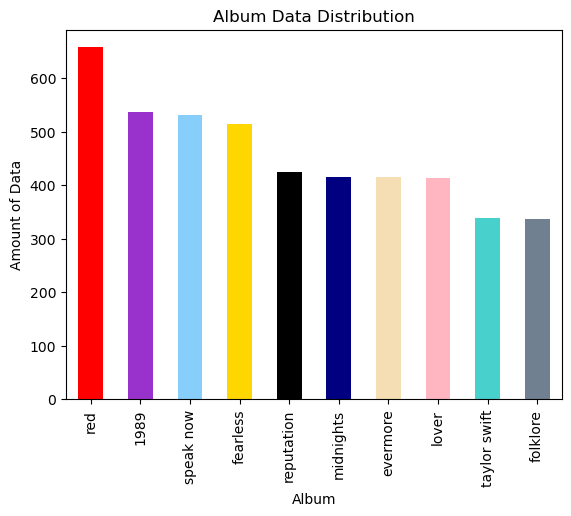

In [16]:
colors = ['r', 'darkorchid', 'lightskyblue', 'gold', 'k', 'navy', 
             'wheat', 'lightpink', 'mediumturquoise', 'slategrey']

data.album_name.value_counts().plot(kind='bar', color=colors);

plt.title('Album Data Distribution');
plt.ylabel('Amount of Data')
plt.xlabel('Album')

In [17]:
# checking actual counts closer
data['album_name'].value_counts()

album_name
red             658
1989            537
speak now       532
fearless        514
reputation      424
midnights       416
evermore        415
lover           413
taylor swift    338
folklore        337
Name: count, dtype: int64

- There seems to be a slight over representation of 'red', which makes sense, because this album has a 10 minute song. When I train, test, and split the data I will be able to take care of this overrepresentation through the stratifying parameter if necessary.
- All of the songs which have more data come from rereleased version's of albums where she added more songs (and then I added into the dataset) so this distribution makes a lot of sense.

**Sentiment Analysis** <br>
To further explore my data, I will be using ‘Vader’ sentiment analysis to see if there are any major differences in sentiment between the albums. Vader will return 4 different sentiment analyses all scored from -1 to +1: <br>
1. The negative sentiment score <br>
2. The neutral sentiment score <br>
3. The positive sentiment score <br>
4. The overall sentiment score <br>


In [20]:
# creating a sentiment analysis object
analyzer = SentimentIntensityAnalyzer()

In [21]:
# extracting albums to iterate over
album_name = data['album_name'].unique()

for album in album_name:
    
    album_df = data[data['album_name'] == album]
    lyrics = album_df['lyrics']
    lyrics = ' '.join(lyrics)
    sentiment_score = analyzer.polarity_scores(lyrics)

    print('album:', album)
    print('sentiment score:', sentiment_score)
    

album: taylor swift
sentiment score: {'neg': 0.079, 'neu': 0.74, 'pos': 0.182, 'compound': 1.0}


album: fearless
sentiment score: {'neg': 0.083, 'neu': 0.754, 'pos': 0.163, 'compound': 1.0}
album: speak now
sentiment score: {'neg': 0.087, 'neu': 0.769, 'pos': 0.144, 'compound': 1.0}
album: red
sentiment score: {'neg': 0.084, 'neu': 0.735, 'pos': 0.181, 'compound': 1.0}
album: 1989
sentiment score: {'neg': 0.101, 'neu': 0.694, 'pos': 0.205, 'compound': 1.0}
album: reputation
sentiment score: {'neg': 0.1, 'neu': 0.739, 'pos': 0.161, 'compound': 0.9999}
album: lover
sentiment score: {'neg': 0.106, 'neu': 0.697, 'pos': 0.197, 'compound': 1.0}
album: evermore
sentiment score: {'neg': 0.121, 'neu': 0.735, 'pos': 0.145, 'compound': 0.9996}
album: folklore
sentiment score: {'neg': 0.122, 'neu': 0.738, 'pos': 0.141, 'compound': 0.9991}
album: midnights
sentiment score: {'neg': 0.108, 'neu': 0.714, 'pos': 0.178, 'compound': 0.9999}


From here, we can see that Vader has classified all of her albums as overwhelmingly positive, with very little variation. However, there appears to be enough differentiation between the negative, neutral, and positive that makes a compelling case for a machine learning model to be able to classify the albums based on text data.